In [15]:
import os
import numpy as np
import imageio

import matplotlib.pyplot as plt

In [2]:
from torchvision import transforms, datasets
import torch

## Load data to Colab

In [5]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

Saving lfw_align_test.zip to lfw_align_test.zip
Saving lfw_align_train.zip to lfw_align_train.zip
User uploaded file "lfw_align_test.zip" with length 6825314 bytes
User uploaded file "lfw_align_train.zip" with length 13742839 bytes


In [7]:
# !unzip -q lfw_align_train.zip
# !unzip -q lfw_align_test.zip
# !ls

lfw_align_test	    lfw_align_train	 sample_data
lfw_align_test.zip  lfw_align_train.zip


## Read Images

In [3]:
data_dir = os.getcwd()
data_dir

'C:\\Users\\HP\\Jupyter\\Course_work\\project\\CNN'

In [4]:
IMAGE_WIDTH = 96
IMAGE_HEIGHT = 96
COLOR_CHANNELS = 3

TOTAL_IMAGES_NUMBER = 9164
TRAIN_IMAGES_NUMBER = 6159
TEST_IMAGES_NUMBER = 3005

BATCH_SIZE = 15

In [5]:
data_transforms = {
    'lfw_align_train': transforms.Compose([       
        transforms.ToTensor(),     
    ]),
    'lfw_align_test': transforms.Compose([
        transforms.ToTensor(),
    ]),
}

### Load data

In [6]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['lfw_align_train', 'lfw_align_test']}

# special class for loading data in the form of batches
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=TOTAL_IMAGES_NUMBER,
                                              shuffle=True, num_workers=4)
               
               for x in ['lfw_align_train', 'lfw_align_test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['lfw_align_train', 'lfw_align_test']}

In [7]:
classes_train = image_datasets['lfw_align_train'].classes
classes_test = image_datasets['lfw_align_test'].classes

In [8]:
train_images = np.zeros((TRAIN_IMAGES_NUMBER, IMAGE_HEIGHT, IMAGE_WIDTH))
train_labels_of_classes = np.zeros((TRAIN_IMAGES_NUMBER))

test_images = np.zeros((TEST_IMAGES_NUMBER, IMAGE_HEIGHT, IMAGE_WIDTH))
test_labels_of_classes = np.zeros((TEST_IMAGES_NUMBER))

Transform images from torch.Tensor to numpy.ndarray

In [10]:
for (images, classes) in dataloaders['lfw_align_train']:
    train_images = images.numpy().reshape((TRAIN_IMAGES_NUMBER, COLOR_CHANNELS, IMAGE_HEIGHT, IMAGE_WIDTH))
    train_labels_of_classes = classes.numpy()

In [9]:
for (images, classes) in dataloaders['lfw_align_test']:
    test_images = images.numpy().reshape(TEST_IMAGES_NUMBER, COLOR_CHANNELS, IMAGE_HEIGHT, IMAGE_WIDTH)
    test_labels_of_classes = classes.numpy()

Нормализация: посчитаем среднее и стандартное отклонение по базе обучения и нормируем каждое изображение на них. 

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


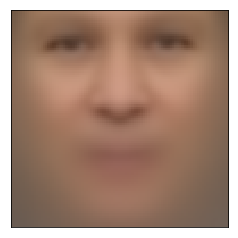

In [21]:
mean = train_images.mean(axis=0)

plt.imshow(np.transpose(mean, (1, 2, 0)))
plt.tick_params(labelleft = False, labelbottom = False, bottom = False, top = False, right = False, left=False, which='both')

imageio.imwrite("mean.jpg", np.transpose(mean, (1, 2, 0)))

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


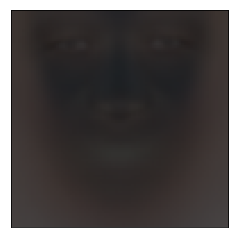

In [22]:
stddev = train_images.std(axis=0)

plt.imshow(np.transpose(stddev, (1, 2, 0)))
plt.tick_params(labelleft = False, labelbottom = False, bottom = False, top = False, right = False, left=False, which='both')

imageio.imwrite("stddev.jpg", np.transpose(stddev, (1, 2, 0)))

## Write mormalized train images into folder

In [74]:
train_images_minus_mean = train_images - mean

In [13]:
train_images_normalized = train_images_minus_mean / stddev

In [ ]:
for i in range(len(train_images_normalized)):
    name = classes_train[train_labels_of_classes[i]]
    path = "./lfw_align_normalized_train/" + name + "/"
    if not os.path.exists(path):
        os.makedirs(path)
    imageio.imwrite(path + name + '_' + str(i) + ".jpg", np.transpose(train_images_normalized[i], (1, 2, 0)))

## Write mormalized test images into folder

In [13]:
test_images_minus_mean = test_images - mean

In [14]:
test_images_normalized = test_images_minus_mean / stddev

In [ ]:
for i in range(len(test_images_normalized)):
    name = classes_test[test_labels_of_classes[i]]
    path = "./lfw_align_normalized_test/" + name + "/"
    if not os.path.exists(path):
        os.makedirs(path)
    imageio.imwrite(path + name + '_' + str(i) + ".jpg", np.transpose(test_images_normalized[i], (1, 2, 0)))